<a href="https://colab.research.google.com/github/anamaria1-4/GitHub-Finanzas_-Computacionales/blob/main/Taller_3_Daniel_Jorge%2C_Ana_Mar%C3%ADa_Rojas%2C_Sarah_Tellez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://www.uexternado.edu.co/wp-content/uploads/2020/07/logo-uec.png" width="180" height="80"> 

<center>

<br><br>

<b>Taller 3</b>
<div style="font-size:175%;color:write; background-color: #0064b0;">Pregrado en Finanzas y Relaciones Internacionales</div>
<div style="font-size:175%;color:white; background-color: #0064b0;">Finanzas Computacionales</div>
<div style="font-size:175%;color:white; background-color: #0064b0;">Profesor: Carlos Andrés Zapata Quimbayo</div>
<div style="font-size:250%;color:white; background-color: #0064b0;">Estudiantes: Sarah Téllez, Daniel Steven Jorge Cardona y Ana María Rojas Giraldo</div>
<div style="font-size:175%;color:white; background-color: #0064b0;">2022</div> 
</center>

* Se importan las librerias necesarias.

In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import scipy.stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
from statsmodels.tsa.stattools import adfuller
from scipy import stats
import statsmodels.api as sm  

In [ ]:
%pip install yfinance
import yfinance as yf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


# Punto 1

## Escoja una acción de su preferencia. Con la información histórica para el periodo Ene-2016 a Dic-2021, estime los parámetros μ y σ.

* Se selecciona la acción de AMAZON, la cual es una de las empresas con mayor reconocimiento en la industria del comercio electrónico, principalmente por los servicios de computación en la nube que ofrecen.

In [ ]:
fechai = "2015-12-01" 
fechaf = "2021-12-31"
periodicidad = "1Mo"
Amazon = ["AMZN"]
precio_amazon = yf.download(Amazon,start=fechai,end=fechaf,interval=periodicidad)
precio_amazon = precio_amazon.loc[:,"Adj Close"].dropna()
retornos_amazon = np.log(precio_amazon/precio_amazon.shift()).dropna()


[*********************100%***********************]  1 of 1 completed


In [ ]:
#Estimación de los parámetros
mu=retornos_amazon.mean()
sigma=retornos_amazon.std() 
mu,sigma

(0.022166662698685023, 0.07738061879452196)

### a.


* Con estos parámetros construya 10.000 trayectorias del precio que sigan el proceso estocástico:

 $$S_t = S_t −_ 1 exp{(μ– 1/2σ^2)dt + σ dW_t}$$

* Donde: W_t es un proceso estándar de Wiener. Presente gráficamente las primeras 20 trayectorias del proceso para un tiempo de un año (T=1).

#### Estimación de parámetros y trayectorias


In [ ]:
def PathsGBM(S0,mu,sigma,T,NS,M):    
    Z = np.random.normal(0.0,1.0,[NS,M])
    S = np.zeros([NS, M+1])
    S[:,0] = S0
    dt = T / M 
    for t in range(0,M):
        S[:,t+1] = S[:,t] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) *Z[:,t]) 
    St = S  
    return St


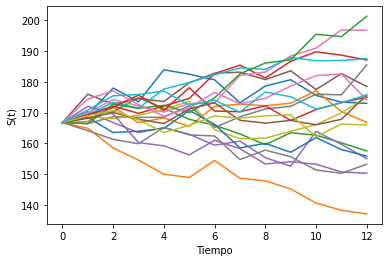

In [ ]:
Preciosdatos=pd.DataFrame(precio_amazon)
T = 1 
mu = mu 
sigma = sigma
S0 = Preciosdatos.iloc[-1,:] 
NS = 10000 
M = 12 
St = PathsGBM(S0,mu,sigma,T,NS,M)
b=St[0:20,:]
plt.plot(np.transpose(b));  
plt.xlabel("Tiempo");
plt.ylabel("S(t)");


Para la construcción de la trayectoria se tómo como valor inicial el último  precio de la acción de Amazon correspondiente a 168.644501 en diciembre 30 de 2021. En la gráfica se puede apreciar que para las primeras 20 trayectorias dentro de un año el precio de la acción oscilaria (aproximadamente) entre 142 y 184. Es decir, se observan los posbibles comportamientos que puede tener el precio de la acción en un horizonte de tiempo de 1 año para la respectiva modelación. Es importante acotar que el comportamiento depende de mu y de sigma hallados anteriormente. 

b. Presente los histogramas de los precios y retornos al final del periodo (T=1)

In [ ]:
Retornosdatos=pd.DataFrame(retornos_amazon)
T = 1 
mu = mu 
sigma = sigma
S01 = Retornosdatos.iloc[-1,:] 
NS = 10000 
M = 12 
St1 = PathsGBM(S01,mu,sigma,T,NS,M)


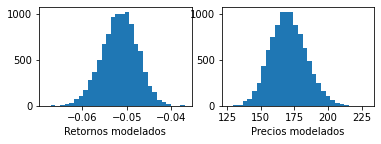

In [ ]:
plt.subplot(2, 2, 1)
plt.hist(St1[:,-1], bins=30, label='Retornos modelados')
plt.xlabel("Retornos modelados")
#plt.xlabel("Retornos")
plt.subplot(2, 2, 2)
plt.hist(St[:,-1], bins=30, label='Precios modelados')
plt.xlabel("Precios modelados")
plt.show()


Por un lado, el histograma de los retornos refleja que simulando 10000 trayectorias dentro de un año, en primer lugar, los retornos son negativos, es decir, existen pérdidas. Así pues, el valor más frecuente es cercano a -0.052 y la dispersión de los datos es aproximadamente desde -0.070 hasta -0.042. De igual modo, se que en términos de curtosis se aprecia un exceso.

Por otro lado, para el histograma de los precios en el que se simulan 10000 trayectorias, se puede apreciar que dentro de un año el precio más frecuente resultaría ser aproximadamente 171. De otra oarte, la dispersión de los datos aproximadamente se encuentre entre 130 y 224. Por último, en este caso también se puede observar un exceo de curtosis.

c. Demuestre que el valor terminal del precio simulado de la acción converge a

$$ S_T exp{(μ–1/2σ^2)} $$


In [ ]:
St[:,-1].mean()  

170.54218145832627

In [ ]:
S0 * np.exp(mu * T) 

Adj Close    170.453818
Name: 2021-12-01 00:00:00, dtype: float64

En efecto, se puede apreciar que el último valor que se registra respecto al precio simulado sí converge a $$ S_T exp{(μ–1/2σ^2)} $$

d. Calcule la probabilidad de que los retornos de la acción sean inferiores a cero.

In [ ]:
Retornosdatos=pd.DataFrame(retornos_amazon)

prob=S01<0
prob.value_counts()/NS

True    0.0001
Name: 2021-12-01 00:00:00, dtype: float64

La probabilidad  de que los retornos simulados de la acción sean inferiores a cero es relativamente baja al ser de 0.01%.

# Punto 2

Con las acciones de: JPM, MCD, META, WMT

### a. Construir el portafolio de mínima varianza global de Markowitz. Presentar el grafico de pesos y sus medidas de retorno esperado y volatilidad

In [ ]:
from traitlets.traitlets import MetaHasDescriptors
import cvxpy as cp
activos = ["JPM", "MCD","META","WMT"]
periodicidad = "1Mo"
precios = yf.download(activos,start="2015-12-01",end="2021-12-31",interval=periodicidad)
precios = precios.loc[:,"Adj Close"].dropna()
retornos=np.log(precios/precios.shift()).dropna()
retornos
mupmvg=retornos.mean()
sd = retornos.std()
cov=retornos.cov()

[*********************100%***********************]  4 of 4 completed


In [ ]:
n=len(mupmvg) 
w= cp.Variable(n) 
risk= cp.quad_form(w,cov)
objective=cp.Minimize(risk)  
constraints=[cp.sum(w)==1, w >= 0] 
prob= cp.Problem(objective,constraints)
prob.solve()
wpmvg=w.value 

* Gráfico de Pesos

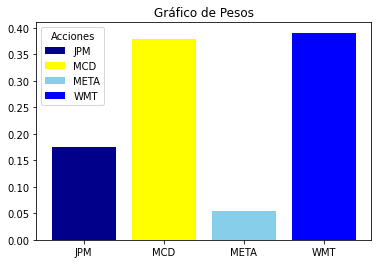

In [ ]:
plt.bar([activos[0]], [wpmvg[0]], color ='darkblue',label = 'JPM')  
plt.bar([activos[1]], [wpmvg[1]], color ='yellow',label = 'MCD')  
plt.bar([activos[2]], [wpmvg[2]], color ='skyblue',label = 'META')  
plt.bar([activos[3]], [wpmvg[3]], color ='blue',label = 'WMT')  
plt.legend(title = "Acciones") 
plt.title("Gráfico de Pesos") 
plt.show();

* Medidas de retorno esperado del portafolio

In [ ]:
ret_port=retornos @ wpmvg
rp=ret_port.mean() 
rp

0.01392549622298093

* Desviación Estándar del Portafolio

In [ ]:
sigmap=ret_port.std()
sigmap

0.038643850520820235

En este caso, el portafolio de mínima varianza global se encuentra compuesto por los siguientes activos: JPMorgan Chase&Co, McDonald's, Meta y Walmart. En donde la participación porcentual (aproximada) para cada uno de los activos es la siguiente: JPMorgan Chase&Co 17.59%, McDonald's 37.89%, Meta 5.45% y Walmart 39.07%. De otra parte, para este portafolio la rentabilidad esperada mensual es de 0.0139 aproximadamente y el riesgo mensual esperado es de 0.0386  aproximadamente.

* Gráfico retorno y riesgo

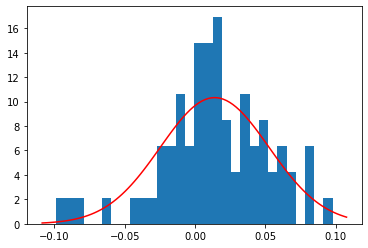

In [ ]:
rp=ret_port.mean()
sigmp=ret_port.std()
rp,sigmp
plt.hist(ret_port,bins=30,density=True)
xmin,xmax=plt.xlim()
r=np.linspace(xmin,xmax,100)
ptr=norm.pdf(r,rp,sigmp)
plt.plot(r,ptr,"r");

Para los datos se asocio una distribución normal, no obstante, se puede observar que este tipo de distribución no es aquella que se ajusta precisamente a los datos, puesto que es claro el exceso de curtosis que tiene la serie, así como el sesgo que tiene la distribución a la izquierda lo que refleja que la moda es menor a la mediana, y esta ,a su vez, resulta menor que la media. 

### b. Calcular el VaR del portafolio para los niveles de confianza del 95% y 99%. Usar el modelo estándar o paramétrico

* Nivel de Confianza del 95%

In [ ]:
from scipy.stats.distributions import alpha
alpha=0.05
VaRp=rp-norm.ppf(1-alpha)*sigmap
VaRp

-0.049637954974848186

Al realizar el VaR del portafolio con un modelo estándar la máxima pérdida sobre un horizonte de tiempo mensual y con un intervalo de confianza del 95% es de 0.0496 aproximadamente. Es decir, si se llega a invertir 1 millón de dólares en el portafolio la máxima pérdida potencial que podría recibir el inversor sería de 49.600 dólares. 

* Nivel de Confianza del 99%

In [ ]:
from scipy.stats.distributions import alpha
alpha=0.01
VaRp=rp-norm.ppf(1-alpha)*sigmap
VaRp

-0.0759735065619864

Al realizar el VaR del portafolio con un modelo estándar la máxima pérdida sobre un horizonte de tiempo mensual y con un intervalo de confianza del 99% es de 0.0759 aproximadamente. Con respecto al mismo ejemplo anterior, al invertir 1 millón de dólares en el portafolio la máxima pérdida potencial a recibir e inversor sería de 75.900 dólares.

Es claro que al cambiar el intervalo de confianza al 99% la máxima pérdida resulta mayor, puesto que el valor del riesgo resulta más ácido.

### c. Calcular el VaR del portafolio para los niveles de confianza del 95% y 99%. Usar el modelo de estimación histórica

* Nivel de Confianza del 95%

In [ ]:
VaRH=np.percentile(ret_port,5)
VaRH

-0.05164251302650356

Al realizar el VaR del portafolio con un modelo de estimación histórica la máxima pérdida sobre un horizonte de tiempo mensual y con un intervalo de confianza del 95% es de 0.0516 aproximadamente. Es decir, si se llega a invertir 1 millón de dólares en el portafolio la máxima pérdida potencial que podría recibir el inversor sería de 51.600 dólares. 

* Nivel de Confianza del 99%

In [ ]:
VaRH=np.percentile(ret_port,1)
VaRH

-0.09264328487812735

Al realizar el VaR del portafolio con un modelo de estimación histórica la máxima pérdida sobre un horizonte de tiempo mensual y con un intervalo de confianza del 99% es de 0.0926 aproximadamente. Con respecto al mismo ejemplo anterior, al invertir 1 millón de dólares en el portafolio la máxima pérdida potencial a recibir el inversor sería de 92.640 dólares. 

Es claro que al cambiar el intervalo de confianza 99% la máxima pérdida resulta mayor, puesto que el valor del riesgo resulta más ácido. Por otra parte, al comparar el VaR del portafolio con el modelo estándar se puede detallar que tanto para una intervalo del confianza del 95% como del 99% esta medida resulta menor al modelo de estimación histórica, puesto que en este segundo no se asume normalidad lo cual conlleva a que se presenten mayores pérdidas.

### d. Calcular el VaR del portafolio para los niveles de confianza del 95% y 99%. Usar el modelo de simulación

* Nivel de Confianza del 95%

In [ ]:
T=1
mu = rp
sigma = sigmap
S0 = rp
NS = 10000 
M = 12 
St1 = PathsGBM(S0,mu,sigma,T,NS,M)
Rets=St1.mean()

Se hallan números aleatorios para realizar el VaR con respecto al modelo de simulación con un nivel de significancia de 5%

In [ ]:
alpha = 0.05
VaRp = Rets - norm.ppf(1-alpha)*sigmap
VaRp

-0.049543364987081784

Al realizar el VaR del portafolio con un modelo de simulación la máxima pérdida sobre un horizonte de tiempo mensual y con un intervalo de confianza del 95% es de 0.0495 aproximadamente. Es decir, si se llega a invertir 1 millón de dólares en el portafolio la máxima pérdida potencial que podría recibir el inversor sería de 49.500 dólares.

* Nivel de Confianza del 99%

In [ ]:
T=1
mu = rp
sigma = sigmap
S0 = rp
NS = 10000 
M = 12 
St1 = PathsGBM(S0,mu,sigma,T,NS,M)
Rets=St1.mean()

In [ ]:
alpha = 0.01
VaRp = Rets - norm.ppf(1-alpha)*sigmap
VaRp

-0.07587536822845439

Al realizar el VaR del portafolio con un modelo de simulación la máxima pérdida sobre un horizonte de tiempo mensual y con un intervalo de confianza del 99% es de 0.0758 aproximadamente. Con respecto al mismo ejemplo anterior, al invertir 1 millón de dólares en el portafolio la máxima pérdida potencial a recibir e inversor sería de 75.800 dólares.

Es claro que al cambiar el intervalo de confianza al 99% la máxima pérdida resulta mayor, puesto que el valor del riesgo resulta más ácido.

# Punto 3

#### Base de datos

In [ ]:
datos = pd.read_excel("/content/DataLoss.xlsx")
datos

,Date,Loss
0,2001-01-01,18986
1,2001-02-01,7312
2,2001-03-01,581
3,2001-04-01,4995
4,2001-05-01,10808
...,...,...
247,2021-08-01,9853
248,2021-09-01,6394
249,2021-10-01,18765
250,2021-11-01,2816


### a. Realizar un análisis exploratorio de los datos (media, desviación, curtosis, simetría). Apoye su análisis con gráficos (histogramas y QQplot).

#### Resumen de los datos

In [ ]:
datos.describe()

,Loss
count,252.000000
mean,9983.123016
std,5591.237909
min,4.000000
25%,5244.250000
50%,10415.500000
75%,14336.750000
max,19948.000000


#### Curtosis

In [ ]:
datos.kurt()

Loss   -1.076109
dtype: float64

#### Asimetria

In [ ]:
datos.skew() 

Loss    0.00489
dtype: float64

* **Curtosis:** esta medida de apuntamiento estudia las frecuencias alrededor de la media. Para la distribución normal estándar se menciona que la curtosis es exactamente igual a 0. No obstante, se puede observar que, las distribuciones de frecuencia de las acciones analizadas, no pertenencen a una distribución normal ya que su curtosis no es 0. Las distribución de frecuencia de estas acciones se encuentran clasificadas dentro de **Leptocúrtica**, es decir, los retornos de las acciones están mucho más concentradas alrededor del promedio y conforman una distribución mucho más apuntada que la normal.

* **Asimetría:** Existe una distribución de frecuencias simétricas cuando la mediana y la media siempre coinciden. No obstante, se observa que para las perdidas, se tiene una simetría cercana a 0, por lo que se puede afirmar que existe una cantidad de datos muy parecidos a la izquierda y a la derecha de la media. Sin embargo, al ser positivo, se tiene un poco mas de datos a la derecha de la media que a la izquierda.



### b. ¿Qué puede decir de la distribución de los datos de pérdidas de la entidad?

#### Gráfica de datos 

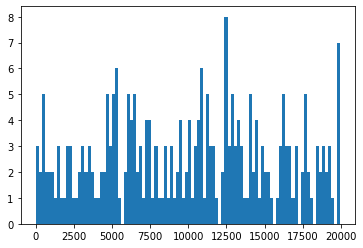

In [ ]:
plt.hist(datos["Loss"], 100);

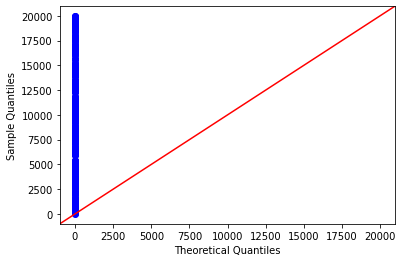

In [ ]:
fig = sm.qqplot(datos["Loss"], line='45')
plt.show()

Al analizar el histograma se puede descartar una **distribución normal**. Sumado al analisis realizado anteriormente de la curtosis y la asimetria,  se puede afirmar que una distribución que se pueda ajustar a las perdidas de la entidad seria la **distribucion uniforme**.

### c. Ajuste diferentes funciones de distribución de probabilidad a los datos. ¿Qué distribución recomienda?

In [ ]:
!pip install fitter
from fitter import Fitter, get_common_distributions, get_distributions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


* Con "Fitter" se prueban diferentes funciones de probabilidad

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  9.72it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
uniform,1.041032e-07,1984.136725,-5433.983819,inf,0.040650,0.783563
powerlaw,1.042813e-07,1986.631183,-5428.023707,inf,0.045614,0.653649
rayleigh,1.240635e-07,2014.631369,-5389.780341,inf,0.083929,0.054174
norm,1.255499e-07,2019.622890,-5386.779128,inf,0.068681,0.177082
gamma,1.255533e-07,2021.622999,-5381.242834,inf,0.068493,0.179411


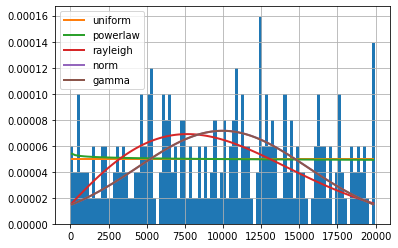

In [ ]:
fa = Fitter(datos["Loss"], distributions= get_common_distributions())
fa.fit()
fa.summary()

* Ajuste solo para la distribucion uniforme

Fitting 1 distributions: 100%|██████████| 1/1 [00:00<00:00,  9.42it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
uniform,1.041032e-07,1984.136725,-5433.983819,inf,0.04065,0.783563


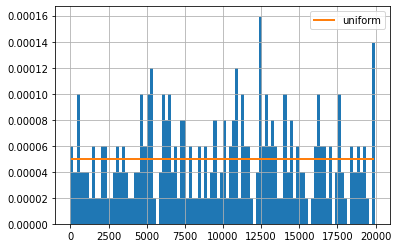

In [ ]:
fa1 = Fitter(datos["Loss"], distributions= ['uniform'])
fa1.fit()
fa1.summary()

Luego de aplicar "Fitter" para probar diferentes funciones de probabilidad se obtuvieron las siguientes distribuciones (Uniform, Powerlaw, Rayleigh, Norm, Gamma).



*   **Sumsquare_error:** La mejor distribucion es aquella que tenga la menor suma de erorres al cuadrado. En este caso la **distribución uniforme** es la que tiene el menor valor con respecto a las otras distribuciones con un valor de 1.041032e-07.
*   **Aic:**  La mejor distribucion es aquella que tenga el menor valor. En este caso la **distribución uniforme** es la que tiene el menor valor con respecto a las otras distribuciones con un valor de 1984.136725.
*   **Bic:**  La mejor distribucion es aquella que tenga el valor bayesiano mas negativo, es decir en valor absoluto es el mas grande. En este caso la **distribución uniforme** es la que tiene el menor valor con respecto a las otras distribuciones con un valor de -5433.983819.

Por lo tanto, se puede concluir que la distribucion que mas se ajusta a los datos es la distribucion uniforme. Sin embargo, al hacer la grafica solo para la distribucion uniforme se puede observar que la mayoria los datos no siguen la linea de distribución uniforme (linea naranja).

### d. Si la frecuencia de los eventos de perdidas sigue una distribución Binomial con parámetros N=12 y p=0.2, calcule la perdida esperada.

VaR Value at risk

In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import scipy.stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [ ]:
N=12
p=0.2
simulations=len(datos)
ma=np.random.binomial(N,p,simulations)
ma
#from scipy.stats.distributions import alpha
#alpha=0.01
#VaRp=mu-(1-alpha)*sigma
#VaRp

array([0, 1, 4, 2, 2, 5, 2, 3, 4, 3, 2, 5, 3, 1, 3, 2, 3, 2, 1, 2, 3, 1,
       2, 0, 3, 0, 3, 1, 0, 2, 3, 5, 2, 4, 2, 1, 3, 3, 2, 3, 0, 2, 5, 0,
       1, 3, 4, 1, 1, 3, 2, 1, 3, 2, 1, 3, 4, 3, 3, 2, 0, 1, 2, 3, 5, 4,
       3, 2, 4, 5, 0, 3, 3, 5, 1, 2, 5, 5, 3, 2, 2, 4, 4, 1, 2, 2, 4, 1,
       2, 3, 1, 4, 3, 4, 3, 2, 2, 1, 4, 1, 2, 5, 4, 4, 3, 2, 3, 2, 3, 3,
       2, 3, 1, 3, 2, 1, 1, 2, 1, 1, 3, 2, 2, 2, 3, 2, 1, 6, 4, 2, 3, 3,
       2, 4, 1, 4, 1, 4, 2, 6, 1, 2, 1, 4, 0, 2, 3, 2, 1, 2, 1, 1, 0, 4,
       4, 2, 2, 4, 3, 3, 2, 2, 3, 2, 0, 5, 0, 2, 3, 6, 2, 4, 3, 3, 0, 4,
       2, 2, 3, 3, 3, 2, 1, 0, 3, 5, 2, 1, 1, 4, 1, 1, 1, 4, 3, 4, 3, 3,
       3, 1, 0, 4, 2, 0, 2, 1, 1, 2, 2, 2, 5, 2, 3, 5, 4, 0, 3, 2, 4, 1,
       1, 2, 3, 2, 4, 3, 4, 4, 2, 3, 2, 3, 0, 2, 1, 3, 4, 1, 2, 0, 2, 4,
       1, 5, 2, 2, 3, 3, 3, 1, 3, 2])

# Punto 4

* Escoja dos activos que presenten un comportamiento de reversión a la media tipo OU.

#### Twitter

In [ ]:
assets1 = ["TWTR"]
data = yf.download(assets1,start="2018-01-01",end="2021-12-31")
precios1 = data.loc[:,"Adj Close"].dropna()

[*********************100%***********************]  1 of 1 completed


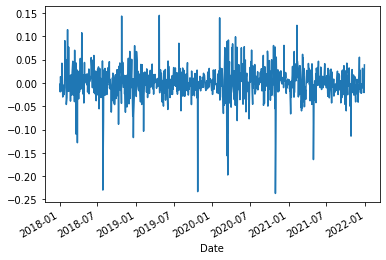

In [ ]:
retornos1 = np.log(precios1/precios1.shift(1)).dropna()
retornos1.plot();

#### Disney

In [ ]:
assets2 = ["DIS"]
data = yf.download(assets2,start="2018-01-01",end="2021-12-31")
precios2 = data.loc[:,"Adj Close"].dropna()

[*********************100%***********************]  1 of 1 completed


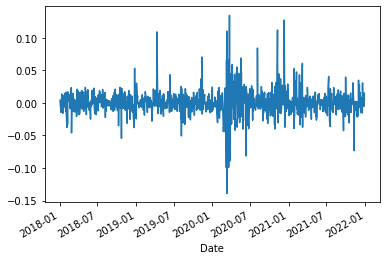

In [ ]:
retornos2 = np.log(precios2/precios2.shift(1)).dropna()
retornos2.plot();

### a. Construya la gráfica de las series históricas de los precios y/o valores

#### Twitter

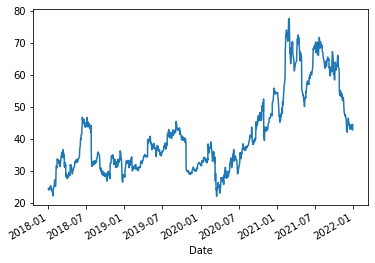

In [ ]:
precios1.plot();

#### Disney

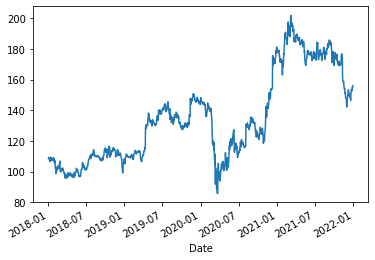

In [ ]:
precios2.plot();

Se puede observar que las acciones de Disney y Twitter posiblemente tienen reversión a la media, ya que tienden a volver a su media respectivamente. No obstante, se debe comprobar a través de diferentes pruebas, en este caso, se usará el Test de Dickey Fuller

### b. Presente los resultados de las pruebas de estacionariedad de Dickey-Fuller (ADF)

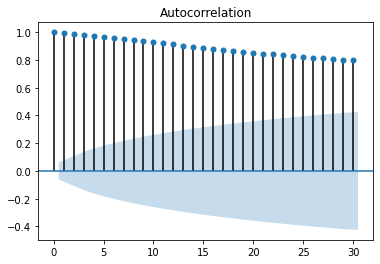

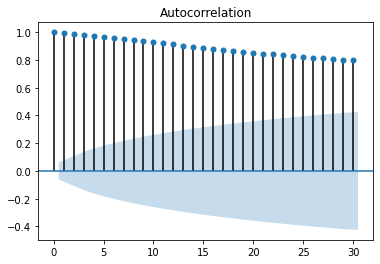

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.api import acf, pacf, graphics
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(precios1, lags=30)

La serie no muestra un comportamiento de tendencia marcado. Por lo tanto, no es suficiente para determinar que la serie es no estacionaria. 

#### Prueba de Dickey-Fuller - Twitter

In [ ]:
pruebadf1 = adfuller(precios1)  
pruebadf1

(-2.0897557678811376,
 0.24865376090632052,
 2,
 1004,
 {'1%': -3.436879978012783,
  '5%': -2.86442302475405,
  '10%': -2.568305057578451},
 3405.9484885063553)

In [ ]:
print("ADF test: %f" % pruebadf1[0])
print("P-value: %f" % pruebadf1[1])
print("Citical values:")
for key, value in pruebadf1[4].items():
  print("\t%s: %f" %(key,value))

ADF test: -2.089756
P-value: 0.248654
Citical values:
	1%: -3.436880
	5%: -2.864423
	10%: -2.568305


Se obtiene el P-value el cual indica la probabilidad de que la hipótesis nula no sea rechazada. Es decir, para esta serie se obtuvo P-value de 0.2486, por lo tanto, existe una probabilidad del 24,86% de que la serie temporal sea no estacionaria. Por otro lado, se observan los valores críticos para un intervalo de confianza del 1%, del 5% y del 10%. Dado que para este caso el valor de prueba es 2.08975 (se toma el valor absoluto) no es mayor que todos los valores críticos la hipótesis nula en la que se evalúa que en la serie temporal existe una raíz unitaria, puede ser rechazada, y por esta razón, se concluye que es una serie temporal no estacionaria apoyada por el P-value que es superior a 1. Por último, se puede mencionar que el Test de Dickey Fuller al ser negativo puede indicar que es de deriva negativa (Browniano negativo).

#### Prueba de Dickey-Fuller - Disney

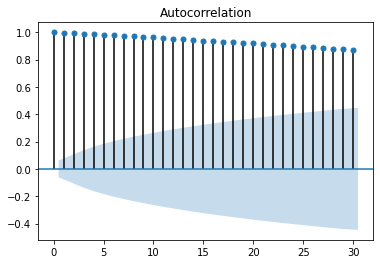

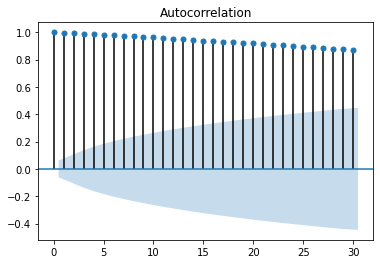

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.api import acf, pacf, graphics
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(precios2, lags=30)

La serie no muestra un comportamiento de tendencia marcado. Por lo tanto, no es suficiente para determinar que la serie es no estacionaria. 

In [ ]:
pruebadf2 = adfuller(precios2)  
pruebadf2

(-1.4064284730800707,
 0.57919037688942,
 10,
 996,
 {'1%': -3.4369325637409154,
  '5%': -2.8644462162311934,
  '10%': -2.568317409920808},
 4631.570658562511)

In [ ]:
print("ADF test: %f" % pruebadf2[0])
print("P-value: %f" % pruebadf2[1])
print("Citical values:")
for key, value in pruebadf2[4].items():
  print("\t%s: %f" %(key,value))

ADF test: -1.406428
P-value: 0.579190
Citical values:
	1%: -3.436933
	5%: -2.864446
	10%: -2.568317


Se obtiene el P-value el cual indica la probabilidad de que la hipótesis nula no sea rechazada. Es decir, para esta serie se obtuvo P-value de 0.5791, por lo tanto, existe una probabilidad del 57,91% de que la serie temporal sea no estacionaria. Por otro lado, se observan los valores críticos para un intervalo de confianza del 1%, del 5% y del 10%. Dado que para este caso el valor de prueba es 1.4064 (se toma el valor absoluto) no es mayor que todos los valores críticos la hipótesis nula en la que se evalúa que en la serie temporal existe una raíz unitaria, puede ser rechazada, y por esta razón, se concluye que es una serie temporal no estacionaria apoyada por el P-value que es superior a 1. Por último, se puede mencionar que el Test de Dickey Fuller al ser negativo puede indicar que es de deriva negativa (Browniano negativo).

### c. Construya 100 trayectorias o simulaciones para cada activo con periodicidad mensual y con duración T=1.

In [ ]:
def PathsGBM(S0,mu,sigma,T,NS,M):    
    Z = np.random.normal(0.0,1.0,[NS,M])
    S = np.zeros([NS, M+1])
    S[:,0] = S0
    dt = T / M 
    for t in range(0,M):
        S[:,t+1] = S[:,t] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) *Z[:,t]) 
    St = S # {"S":S} 
    return St

#### Twitter

* Estimación de Parámetros




In [ ]:
mu1=retornos1.mean()
sigma1=retornos1.std() 
mu1,sigma1

(0.0005919569394289952, 0.0333010439967857)

In [ ]:
datos_t = pd.DataFrame(precios1)
T = 1
mu= mu1
sigma= sigma1
S0 = datos_t.iloc[-1,:]
NS = 100 # Trayectrias
M = 12
St1 = PathsGBM(S0,mu,sigma,T,NS,M)

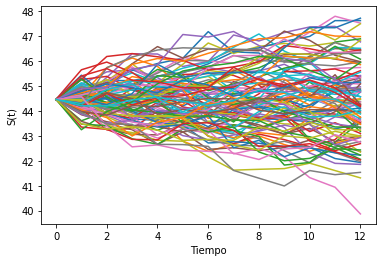

In [ ]:
plt.plot(np.transpose(St1))
plt.xlabel("Tiempo")
plt.ylabel("S(t)");

Para la modelación se toma como punto de partida o inicial el último precio de la acción de Twitter, es decir, 44.46 dólares con una cantidad de 100 trayectorias. Asimismo, se establece que el periodo de la modelación será de 1 año, es decir, la modelación contará con 12 intervalos respectivamente. Por lo tanto, a través de la gráfica se pueden observar las posibles trayectorías que tendrían los retornos dentro de 1 año. 

#### Disney

* Estimación de Parámetros




In [ ]:
mu2=retornos2.mean()
sigma2=retornos2.std() 
mu2,sigma2

(0.00035842509283044775, 0.019701982873495796)

In [ ]:
datos_d = pd.DataFrame(precios2)
T = 1
mu= mu2
sigma= sigma2
S0 = datos_d.iloc[-1,:]
NS = 100 # Trayectrias
M = 12
St2 = PathsGBM(S0,mu,sigma,T,NS,M)

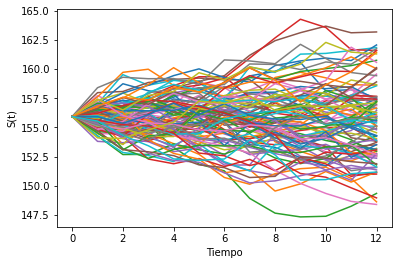

In [ ]:
plt.plot(np.transpose(St2)) 
plt.xlabel("Tiempo")
plt.ylabel("S(t)");

Para la modelación se toma como punto de partida o inicial el último precio de la acción de Disney, es decir, 155.93 dólares con una cantidad de 100 trayectorias. Asimismo, se establece que el periodo de la modelación será de 1 año, es decir, la modelación contará con 12 intervalos respectivamente. Por lo tanto, a través de la gráfica se pueden observar las posibles trayectorías que tendrían los retornos dentro de 1 año.